In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

In [2]:
# The aggregated data
data = pd.read_csv("Data/merged_dataset.csv")
# Use the cubehelix palette for the char
# Use the specified cubehelix palette as a colormap for the chart
palette = sns.cubehelix_palette(start=0.5, rot=-0.5, as_cmap=True)

In [3]:
emotion_columns = ["I felt bored", "I felt satisfied", "I felt annoyed", "I felt curious"]

In [4]:
# Step 4: Aggregate the Data (Mean per Participant for Each Emotion)
aggregated_per_participant = data.groupby("Participant ID")[emotion_columns].mean()

In [5]:
# Step 4: Melt the Aggregated Data for Visualization
aggregated_melted = aggregated_per_participant.reset_index().melt(
    id_vars=["Participant ID"], value_vars=emotion_columns, var_name="Emotion", value_name="Score"
)

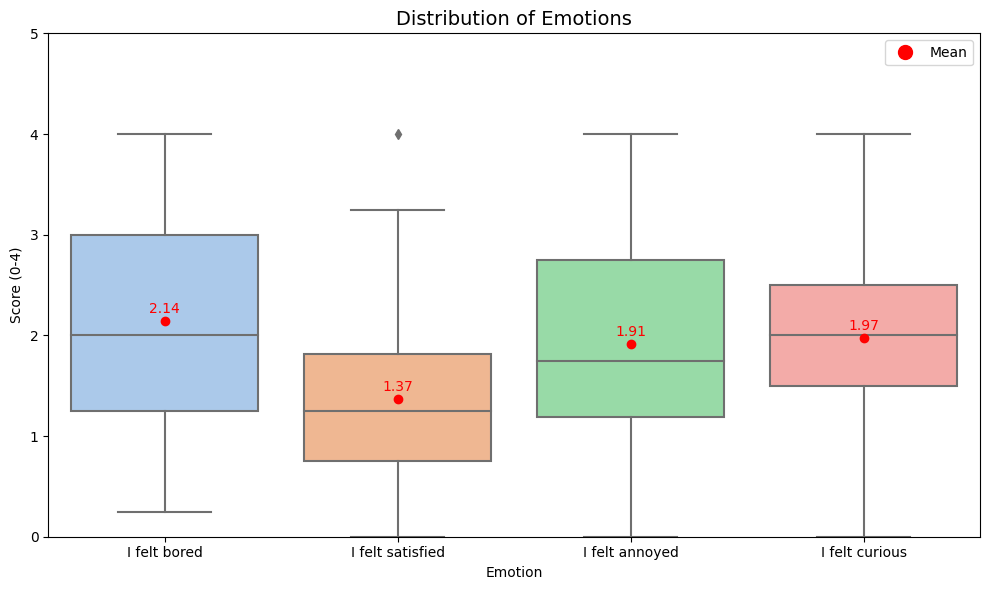

In [6]:
# Recalculate the means to ensure they are properly defined
mean_values_actual = aggregated_melted.groupby("Emotion")["Score"].mean()

# Reorder the mean values to match the boxplot's order
boxplot_order = aggregated_melted["Emotion"].unique()  # Order of emotions in the boxplot
mean_values_corrected = mean_values_actual.reindex(boxplot_order)

# Plot the corrected boxplot with proper mean value alignment
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=aggregated_melted,
    x="Emotion",
    y="Score",
    palette="pastel",
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "red"},
)

# Annotate mean values on the plot with corrected alignment
for i, mean in enumerate(mean_values_corrected):
    plt.text(
        i, mean + 0.05,  # Place slightly above the dot
        f"{mean:.2f}",  # Format mean value to 2 decimal places
        color="red",
        ha="center",  # Center-align horizontally
        va="bottom",  # Vertically align just above the red dot
        fontsize=10,
    )

# Add a legend for the red dot (mean)
red_dot = plt.Line2D([], [], color="red", marker="o", linestyle="None", markersize=10, label="Mean")
plt.legend(handles=[red_dot], loc="upper right")

# Add labels and title
plt.title("Distribution of Emotions", fontsize=14)
plt.xlabel("Emotion")
plt.ylabel("Score (0-4)")
plt.ylim(0, 5)  # Assuming the scale is 0-4
plt.tight_layout()
plt.show()

# Emotion vs Control

In [7]:
''' 
# Selecting relevant columns for analysis
emotion_columns = ["I felt bored", "I felt satisfied", "I felt annoyed", "I felt curious"]
control_column = "Who had the overall control of the interaction?"

# Cleaning the data (removing NaN and ensuring numeric types)
filtered_data = data[["Participant ID", control_column] + emotion_columns].dropna()
filtered_data[control_column] = pd.to_numeric(filtered_data[control_column], errors='coerce')
filtered_data[emotion_columns] = filtered_data[emotion_columns].apply(pd.to_numeric, errors='coerce')

# Aggregating by participant for mean emotion scores
aggregated_data = filtered_data.groupby("Participant ID").mean().reset_index()

# Melting the data for visualization
melted_data = aggregated_data.melt(
    id_vars=[control_column], value_vars=emotion_columns, var_name="Emotion", value_name="Score"
)

# Scatter plots with regression lines for each emotion vs. control level
for emotion in emotion_columns:
    sns.lmplot(
        data=aggregated_data,
        x=control_column,
        y=emotion,
        aspect=1.5,
        scatter_kws={'alpha': 0.7},
        line_kws={'color': 'red'}
    )
    plt.title(f"Control vs {emotion}")
    plt.xlabel("Control Level")
    plt.ylabel(emotion)
    plt.show()

# Boxplot of emotions grouped by control level
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=melted_data,
    x=control_column,
    y="Score",
    hue="Emotion",
    palette="pastel"
)
plt.title("Emotions by Control Level")
plt.xlabel("Control Level")
plt.ylabel("Emotion Scores")
plt.legend(title="Emotion", loc="upper right")
plt.show()

# Heatmap of average scores for each control level
heatmap_data = aggregated_data.groupby(control_column)[emotion_columns].mean()
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar_kws={"label": "Average Score"})
plt.title("Average Emotion Scores by Control Level")
plt.xlabel("Emotion")
plt.ylabel("Control Level")
plt.show()

# Line plot of average emotion scores across control levels
plt.figure(figsize=(10, 6))
for emotion in heatmap_data.columns:
    plt.plot(heatmap_data.index, heatmap_data[emotion], marker='o', label=emotion)
plt.title("Average Emotion Scores by Control Level")
plt.xlabel("Control Level")
plt.ylabel("Average Emotion Scores")
plt.legend(title="Emotion")
plt.grid(True)
plt.show()
'''

' \n# Selecting relevant columns for analysis\nemotion_columns = ["I felt bored", "I felt satisfied", "I felt annoyed", "I felt curious"]\ncontrol_column = "Who had the overall control of the interaction?"\n\n# Cleaning the data (removing NaN and ensuring numeric types)\nfiltered_data = data[["Participant ID", control_column] + emotion_columns].dropna()\nfiltered_data[control_column] = pd.to_numeric(filtered_data[control_column], errors=\'coerce\')\nfiltered_data[emotion_columns] = filtered_data[emotion_columns].apply(pd.to_numeric, errors=\'coerce\')\n\n# Aggregating by participant for mean emotion scores\naggregated_data = filtered_data.groupby("Participant ID").mean().reset_index()\n\n# Melting the data for visualization\nmelted_data = aggregated_data.melt(\n    id_vars=[control_column], value_vars=emotion_columns, var_name="Emotion", value_name="Score"\n)\n\n# Scatter plots with regression lines for each emotion vs. control level\nfor emotion in emotion_columns:\n    sns.lmplot(\n 

In [8]:
''' 

import matplotlib.pyplot as plt

# Step 4: Visualize the stacked bar chart for before merging
plt.figure(figsize=(12, 8))
ax = original_breakdown.plot(kind='bar', stacked=True, colormap="viridis", figsize=(10, 6))

# Annotate the bars with the exact participant counts
for bar_container in ax.containers:
    for bar in bar_container:
        height = bar.get_height()
        if height > 0:  # Only annotate non-zero values
            ax.annotate(
                f"{int(height)}",  # Value to annotate
                (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),  # Position
                ha='center', va='center', fontsize=10, color='black'
            )

# Chart details
plt.title("Breakdown of 'I felt bored' Ratings by Original Control Levels", fontsize=16)
plt.xlabel("Control Level", fontsize=12)
plt.ylabel("Number of Participants", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Bored Rating", loc="upper left", bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()
''' 


' \n\nimport matplotlib.pyplot as plt\n\n# Step 4: Visualize the stacked bar chart for before merging\nplt.figure(figsize=(12, 8))\nax = original_breakdown.plot(kind=\'bar\', stacked=True, colormap="viridis", figsize=(10, 6))\n\n# Annotate the bars with the exact participant counts\nfor bar_container in ax.containers:\n    for bar in bar_container:\n        height = bar.get_height()\n        if height > 0:  # Only annotate non-zero values\n            ax.annotate(\n                f"{int(height)}",  # Value to annotate\n                (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),  # Position\n                ha=\'center\', va=\'center\', fontsize=10, color=\'black\'\n            )\n\n# Chart details\nplt.title("Breakdown of \'I felt bored\' Ratings by Original Control Levels", fontsize=16)\nplt.xlabel("Control Level", fontsize=12)\nplt.ylabel("Number of Participants", fontsize=12)\nplt.xticks(rotation=0)\nplt.legend(title="Bored Rating", loc="upper left", bbox_to_anch

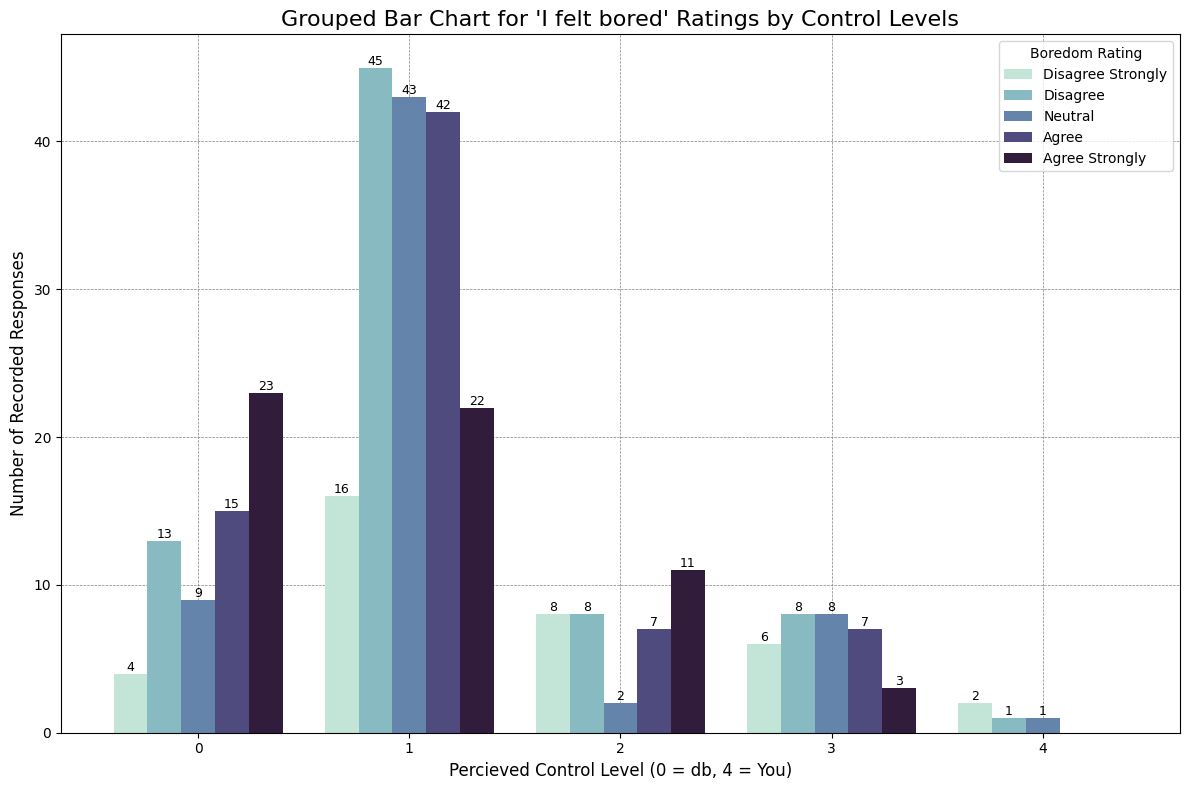

In [9]:
# Define a mapping for the rating labels
rating_labels = {
    0: "Disagree Strongly",
    1: "Disagree",
    2: "Neutral",
    3: "Agree",
    4: "Agree Strongly"
}
# Selecting relevant columns for analysis
emotion_columns = ["I felt bored", "I felt satisfied", "I felt annoyed", "I felt curious"]
control_column = "Who had the overall control of the interaction?"

# Cleaning the data (removing NaN and ensuring numeric types)
filtered_data = data[["Participant ID", control_column] + emotion_columns].dropna()
filtered_data[control_column] = pd.to_numeric(filtered_data[control_column], errors='coerce')
filtered_data[emotion_columns] = filtered_data[emotion_columns].apply(pd.to_numeric, errors='coerce')

# Aggregating by participant for mean emotion scores

# Prepare data for visualization
bored_breakdown_pivot = filtered_data.groupby(control_column)["I felt bored"].value_counts().unstack().fillna(0)

# Rename the columns of the pivot table to the new rating labels
bored_breakdown_pivot_renamed = bored_breakdown_pivot.rename(columns=rating_labels)

# Plot the grouped bar chart with the updated rating labels
fig, ax = plt.subplots(figsize=(12, 8))
bars = bored_breakdown_pivot_renamed.plot(
    kind="bar",
    ax=ax,
    colormap=palette,
    width=0.8
)
ax.set_axisbelow(True)  # Ensure gridlines are behind the bars
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')  # Add gridlines

plt.title("Grouped Bar Chart for 'I felt bored' Ratings by Control Levels", fontsize=16)
plt.xlabel("Percieved Control Level (0 = db, 4 = You)", fontsize=12)
plt.ylabel("Number of Recorded Responses", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Boredom Rating", loc="upper right")

# Add occurrence numbers on top of each bar
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only label bars with non-zero height
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{int(height)}",
                ha="center",
                va="bottom",
                fontsize=9
            )

plt.tight_layout()
plt.show()